In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
#  data collection and processing

gold_data=pd.read_csv("gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.shape

(2290, 6)

In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
# correlation

correlation=gold_data.corr()

<AxesSubplot:>

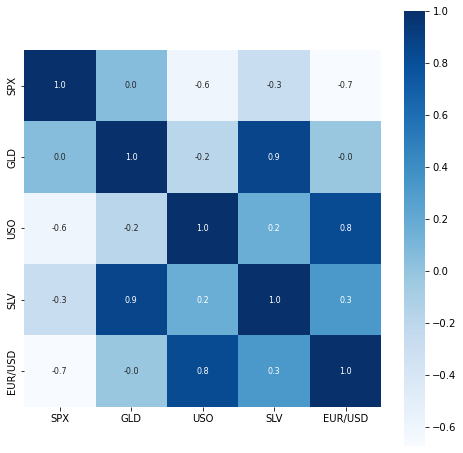

In [9]:
# heatmap for correlation values

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

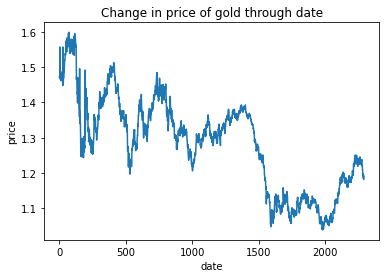

In [10]:
# plot price of gold for each increasing day
gold_data["EUR/USD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

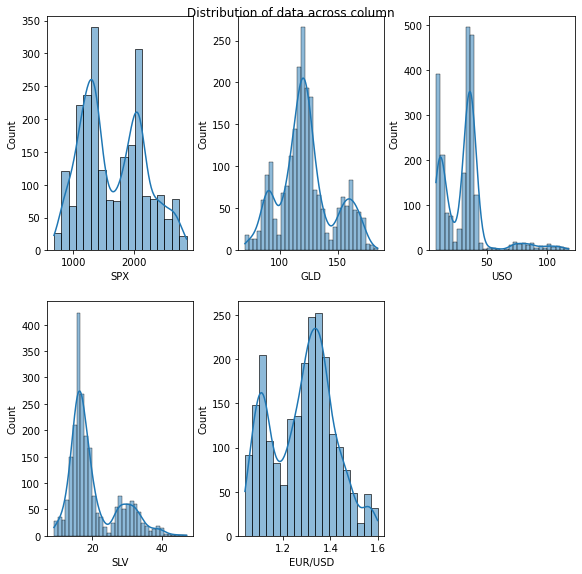

In [11]:
# Distribution of Columns
fig = plt.figure(figsize=(8, 8))
 
# suptitle of the graph
fig.suptitle('Distribution of data across column')
temp = gold_data.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=gold_data, x=item, kde=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [12]:
# correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

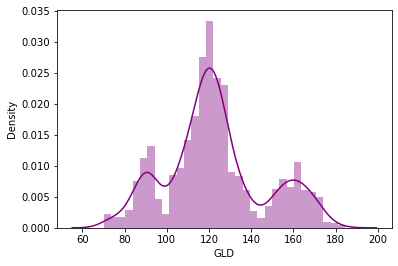

In [13]:

# checking the distribution of the GLD price

sns.distplot(gold_data['GLD'],color='purple')

In [14]:
# splitting the features and target

x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

print(x)



              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
# model training

# Random Forest Regressor

regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
# model evaluation

# prediction on test data
test_data_prediction=regressor.predict(x_test)

In [19]:
print(test_data_prediction)

[168.45279882  82.13549991 115.9972     127.45210033 120.81890126
 154.77989819 150.17889769 126.21100037 117.44999874 125.92690071
 116.59690099 171.8710008  142.01229848 167.81789866 115.19250012
 117.62740058 139.29800293 170.19630104 159.30110326 157.5613002
 155.1213001  125.36790002 175.89760021 157.22120332 125.25090017
  94.27419971  77.2973     120.45209975 119.05959921 167.48259974
  87.98380031 125.39560058  91.33310109 117.6575     121.0267994
 136.95360054 115.32620119 115.22250071 146.54210025 107.15810085
 104.39770253  87.23839775 126.50530095 117.96899945 153.2718991
 119.66700008 108.40269987 108.04929832  93.26080048 127.29759722
  75.56750032 113.68109939 121.44949997 111.13259894 118.79449878
 120.99469908 159.05090004 168.0671011  147.13639706  85.63569834
  94.2771002   86.931099    90.42840003 119.03890064 126.45510053
 127.66680001 167.47289977 122.32059941 117.25969917  98.33330065
 168.32380132 143.39739781 132.29490227 121.18300229 121.24339949
 119.64630079

In [20]:
# R Squared error

error_score=metrics.r2_score(y_test,test_data_prediction)
print("R Squared error: ",error_score)

R Squared error:  0.9887514915329533


In [21]:
# compare the actual and predicted values in a plot

y_test=list(y_test)

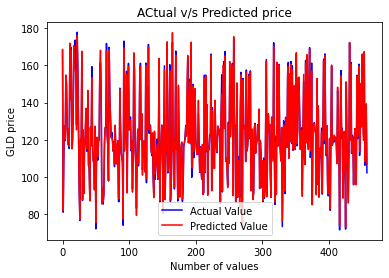

In [22]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='red',label='Predicted Value')
plt.title('ACtual v/s Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()